<h1><center>COMS7047A A1: Linear Regression</center></h1> 

<img src="./img/wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  March 2021</center></h4>

In [112]:
#----INSTALL LIBRARIES----#
#get rid of libraries that aren't allowed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Data Import
The chosen dataset involves factors affecting medical insurance costs where costs are predicted based on variables such as *age, sex, bmi, children, smoker, region* and *charges*. 

In [113]:
#----IMPORT DATA----#
data_path = "./data/insurance.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preparation

In [114]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



No missing values found therefore no imputation needed.

## Data Exploration

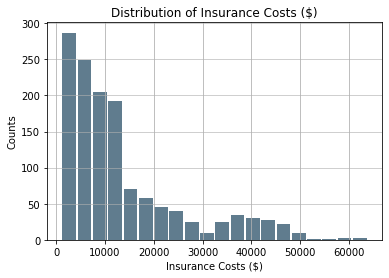

In [115]:
#----DATA EXPLORATION----#

#Visualise target variable: insurance costs (charges)
df["charges"].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Insurance Costs ($)')
plt.ylabel('Counts')
plt.xlabel('Insurance Costs ($)')
plt.grid(axis='y', alpha=0.75)

### Continuous Variables

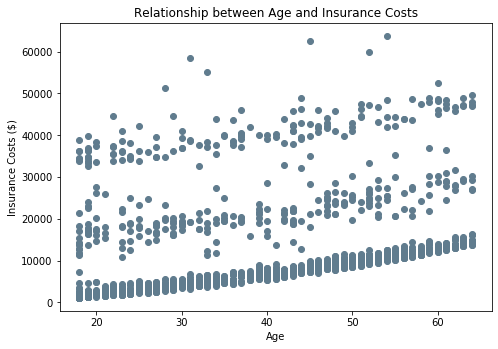

In [116]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

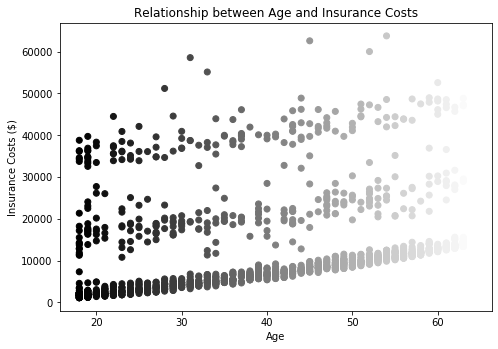

In [117]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
#ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.scatter(df["age"], df["charges"], c=df["age"], cmap='gray')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

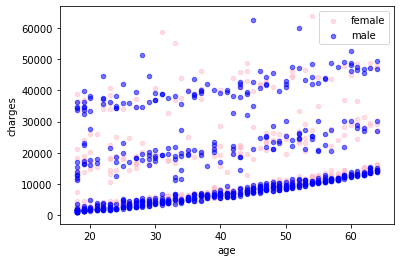

In [118]:
#Relationship between charges, age and sex

fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='charges', label=key, color=colors[key], alpha=0.55)

plt.show()

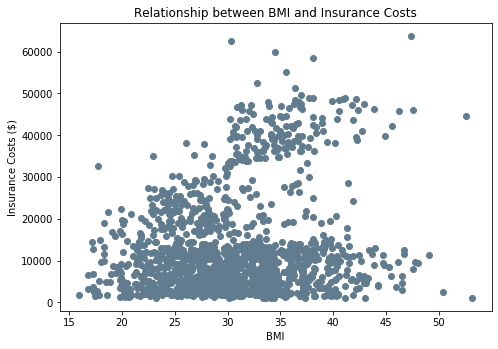

In [119]:
#Relationship between charges and bmi

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["bmi"], df["charges"], color='#607c8e')
ax.set_xlabel('BMI')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between BMI and Insurance Costs')
plt.show()

### Categorical Variables

Text(0.5, 1.0, 'Relationship between No. of Dependents and Insurance Costs')

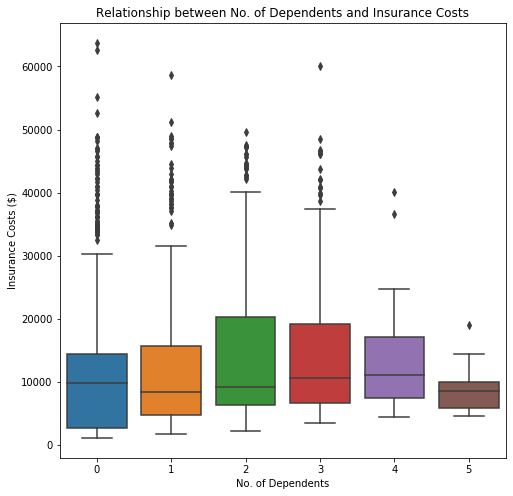

In [120]:
#Relationship between charges and children -> change colours/make more uniform??
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="children", y="charges", data=df)
ax.set_xlabel('No. of Dependents')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between No. of Dependents and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Sex and Insurance Costs')

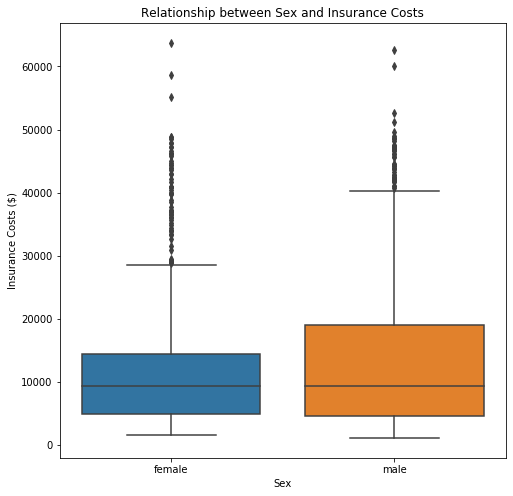

In [121]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="sex", y="charges", data=df)
ax.set_xlabel('Sex')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Sex and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Region and Insurance Costs')

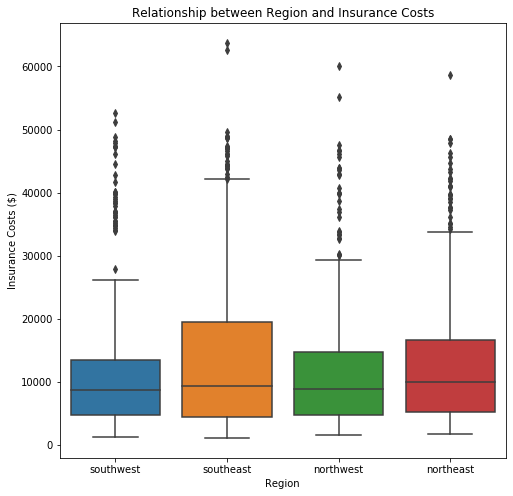

In [122]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="region", y="charges", data=df)
ax.set_xlabel('Region')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Region and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Smoking and Insurance Costs')

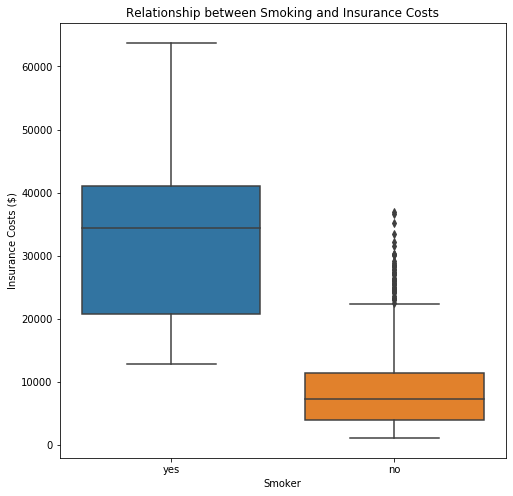

In [123]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="smoker", y="charges", data=df)
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Smoking and Insurance Costs')

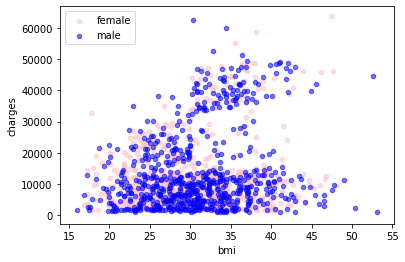

In [124]:
# Combined relationships

fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bmi', y='charges', label=key, color=colors[key], alpha=0.55)

plt.show()

A clear correlation between smoking and increased medical costs can be observed from the contrast in distributions.

### Data Transformation

Categorical variables require encoding to be input to the linear regression model.

In [125]:
# Categorical encoding
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [126]:
# One Hot Encoding
dummy_variable_1=pd.get_dummies(df["sex"])
df = pd.concat([df, dummy_variable_1], axis=1)
dummy_variable_2=pd.get_dummies(df["smoker"])
df = pd.concat([df, dummy_variable_2], axis=1)

In [127]:
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes
0,19,female,27.900,0,yes,3,16884.92400,1,0,0,1
1,18,male,33.770,1,no,2,1725.55230,0,1,1,0
2,28,male,33.000,3,no,2,4449.46200,0,1,1,0
3,33,male,22.705,0,no,1,21984.47061,0,1,1,0
4,32,male,28.880,0,no,1,3866.85520,0,1,1,0


In [128]:
# Correlation
df["charges"].corr(df["yes"]) # v. high correlation with smoking 'yes'

0.7872514304984772

In [129]:
df["charges"].corr(df["age"]) # correlation with age

0.29900819333064765

In [130]:
df["charges"].corr(df["bmi"]) # correlation with bmi

0.19834096883362892

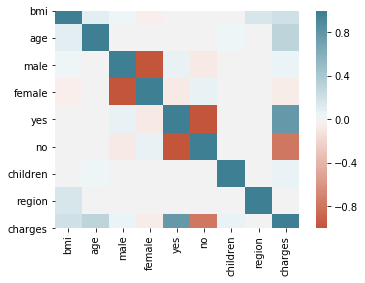

In [131]:
features = df[["bmi", "age", "male", "female", "yes", "no", "children", "region", "charges"]]
feat_corr = features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
#male and female, and yes and no encode redundant info

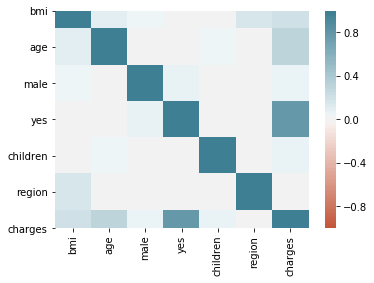

In [132]:
reduced_features = df[["bmi", "age", "male", "yes", "children", "region", "charges"]]
feat_corr = reduced_features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

We observe that being a smoker has the highest correlation with increased medical insurance charges. This is followed by age, bmi and then very low correlation with being male and number of children. No correlation is observed with region.

## 1. Implementation of Basic Linear Regression

### Linear Regression Model

We first build a basic linear regression model. Linear regression can be written as the following equation:

$$
\begin{align}
y &= h_{\theta}(x) = \sum_{j=0}^d \theta_{j} x_j  
\end{align}
$$

where $d$ represents the number of input features.
It should be noted that we assume $x_0 = 1$ in order to provide a bias or intercept term. Therefore 

$$
\begin{align}
y = h_{\theta}(x) &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_d x_d \\
&= \theta_0 + \sum_{j=1}^d \theta_{j} x_j 
\end{align}
$$
   
   
We implement this form of the equation in the method *linear_pred* below.   

In [133]:
#---BASIC LINEAR MODEL---#


"""
Predicts output y based on input features x according to a linear hypothesis function.

Parameters:
    Input features x
    Parameter/weight matrix theta
    Bias term theta_0

Returns:
    Value predicted by the hypothesis function for the given input x.

"""
def linear_pred(x, theta, theta_0): # takes in input features, parameters and bias term
    y = np.dot(x, theta) + theta_0 # implements linear regression equation above
    return y # returns prediction


We then define the cost function for 'least squares' linear regression, given by the equation:

$$
\begin{align}
J(\theta) &= \frac{1}{2n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2 
\end{align}
$$

where $n$ is the number of training examples. This cost function represents the sum of squared errors between the predicted and true values of $y$. We implement the cost function in the method *cost* below.

In [134]:
#---COST FUNCTION---#

def cost(pred, true): # takes in predicted and true values of output y (medical charges in dollars)
    cost = (1/2)*np.mean((true - pred)**2) # calculate cost as the sum of squared errors
    return cost # return cost for use in gradient descent
    

In order to fit our linear regression model to the given data, we perform gradient descent.
Our goal during gradient descent is to minimize the cost $J(\theta)$ by finding the optimal values of the parameters $\theta$. We implement the following procedure:

- Choose initial values for parameters $\theta$
- Until we reach convergence:
    * Update the value of $\theta$ by moving in the direction of the gradient $\frac{\partial J(\theta)}{\partial \theta_{j}}$

Through this process of gradient descent, we reach the global minima and therefore minimize cost $J(\theta)$.

Therefore, before implementing gradient descent, we need to first calculate the gradient of the cost function with respect to the parameters $\theta$. This gradient is calculated as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(x_j^{(i)}) 
\end{align}
$$

We also require the bias term $\theta_0$ to be updated. We use the same formula above but with the input $x_0 = 1$ as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(1) 
\end{align}
$$

In [135]:
#---GRADIENT OF THE COST FUNCTION---#

# calculate gradient of cost function wrt parameters theta_1 to theta_d
def gradient(pred, true, x):
    n = pred.shape[0] # number of training examples
    grad = (np.dot(np.transpose(x),(pred-true))) / n # calculate gradient
    return grad # return the gradient of the cost function w.r.t theta


# calculate gradient of cost function wrt bias term theta_0
def theta_0_gradient(pred, true, x):
    grad = np.sum(pred-true) / pred.shape[0]
    return grad

In order to provide a stopping condition, two differing methods were considered to best perform the experimentation.

1. Fixed number of iterations
2. The parameters $\theta$ cease to alter significantly such that the change in $\theta$ values falls below a certain threshold $\epsilon$

In order to implement the second condition, the Euclidean norm between the previous and updated $\theta$ values was calculated according to:

$$
\begin{align}
|| \theta_{new} - \theta_{old} ||_2 &= \sqrt{\sum_{i=0}^d (\theta_{new_i} - \theta_{old_i} )^2}
\end{align}
$$

In [136]:
#---STOPPING CONDITIONS---#

def euclid(theta, theta_prev):
    return np.linalg.norm(theta - theta_prev) # returns euclidean norm representing change in theta values

### Visualisation of Training Process

In [137]:
#---VISUALISATION---#

# evaluate model on test data using mean squared error - use cost function instead to be comparable??
def evaluate(x_test, y_test, theta, theta_0):
    y_pred = linear_pred(x_test, theta, theta_0)
    mse = mean_squared_error(y_test, y_pred)
    return mse


def plot_test_train_loss(losses, test_losses):
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.plot(test_losses, label = "Test Loss", color = 'c')
    plt.legend()
    plt.show()
    

def plot_hypothesis(x, y, theta, theta_0):
    plt.scatter(x, y, marker= 'o', s=40, color='m')
    plt.plot(x, linear_pred(x, theta, theta_0), color='c', lw=2)
    plt.show()


# add more visualisations here
def visualisation(losses, test_losses, thetas):
    plot_test_train_loss(losses, test_losses) # plot test and training loss per iteration
    #plot_thetas(thetas, losses) # plot loss according to theta value

### Gradient Descent

Batch gradient descent was chosen to be implemented since the the size of the training dataset was relatively small (< 1000 training samples). Therefore, for each iteration, prediction is performed for *all* the training examples before the parameters are updated. This provides a smoother descent to the global minima.

In [138]:
#---BATCH GRADIENT DESCENT---#

def batch_grad_desc(x_train, y_train, x_test, y_test, lr, epsilon):
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = 400 # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    
    # perform gradient descent until convergence
    # while(loops < MAX_LOOPS): # alternative stopping condition
    while(euclid(theta, theta_prev) > epsilon): # stop when change in theta values is no longer signficant
        pred = linear_pred(x_train, theta, theta_0) # predict for all training samples
        loss = cost(pred, y_train) # calculate cost based on current theta values
        losses.append(loss)
        theta_prev = theta # store previous theta for use in stopping condition
        thetas.append(theta) # store theta values for visualisation
        grad = gradient(pred, y_train, x_train) # calculate gradient wrt theta
        grad_theta_0 = theta_0_gradient(pred, y_train, x_train) # calculate gradient wrt theta_0
        theta = theta - (lr*grad) # update parameters
        theta_0 = theta_0 - (lr*grad_theta_0) # update bias
        test_loss = evaluate(x_test, y_test, theta, theta_0) 
        test_losses.append(test_loss)
        loops += 1
        
    # Visualise train and test error and gradient descent process
    visualisation(losses, test_losses, thetas)
    return [theta, theta_0] # return fitted parameter values
    
    
    
#def stochastic_grad_desc:
    

    
    
#def mini_batch_grad_desc:

In order to provide a baseline comparator to benchmark the outcome of the gradient descent algorithm, the closed form solution for the parameters $\theta$ was calculated as follows:

$$
\begin{align}
\theta = (X^T X)^{-1} X^Ty
\end{align}
$$

In [139]:
# NB what about bias? should we add in a column of 1's?
# calculate closed form solution
def normal_eq(x_train, y_train):
    X0 = np.ones((x_train.shape[0],1)) # add x_0 = 1
    Xnew = np.hstack((X0, x_train))
    theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(Xnew), Xnew)), np.dot(np.transpose(Xnew), y_train)) #when is it a dot product and when not
    return theta_all

In [140]:
def custom_linear_regr(x, y, lr, epsilon):

    # split data into train and test sets 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

    print("Normal Equation")
    print("Intercept : {}".format(normal_eq(x_train, y_train)[0]))
    print("Coefficients : {}".format(normal_eq(x_train, y_train)[1:]))
    
    
    # perform batch gradient descent
    print("\nTraining model...")
    theta, theta_0 = batch_grad_desc(x_train, y_train, x_test, y_test, lr, epsilon) # fit model using training data
    
    print("\nCalculated Parameter Values:\n")
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))

    print("\nPredict using test data...")
    y_pred = linear_pred(x_test, theta, theta_0) # predict on test data

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(cost(y_pred, y_test)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    
    return theta, theta_0
    

### Single Variable Linear Regression

#### Body Mass Index (BMI) as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [2725.6360132]
Coefficients : [[339.52829171]]

Training model...


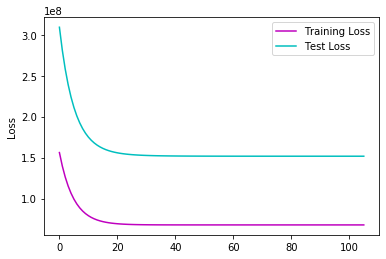


Calculated Parameter Values:

Intercept : 14.422965026352676
Coefficients : [[424.48083176]]

Predict using test data...
R2 Score : 0.05416601356648565
Model Accuracy: 5.416601356648565%
Cost : 75825241.00584236
MSE : 151650482.01168472




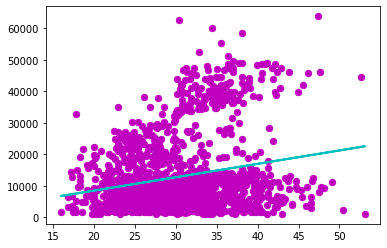

In [162]:
learning_rate = 0.0001
epsilon = 0.0005
x = df[["bmi"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon)
plot_hypothesis(x, y, theta, theta_0)

#### Age as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


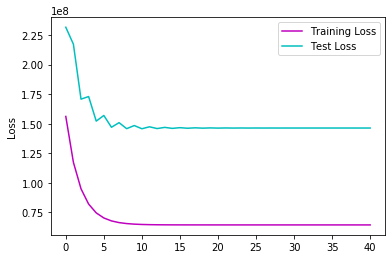


Calculated Parameter Values:

Intercept : 22.40346055854907
Coefficients : [[322.42866457]]

Predict using test data...
R2 Score : 0.08741680998198309
Model Accuracy: 8.741680998198309%
Cost : 73159604.44804826
MSE : 146319208.89609653




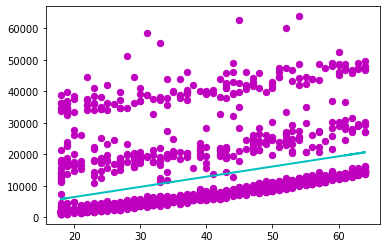

In [142]:
learning_rate = 0.001
epsilon = 0.005
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon)
plot_hypothesis(x, y, theta, theta_0)

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


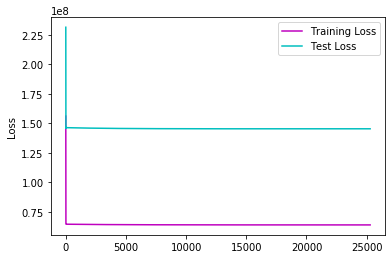


Calculated Parameter Values:

Intercept : 3137.293708697063
Coefficients : [[252.3984558]]

Predict using test data...
R2 Score : 0.09340195043459987
Model Accuracy: 9.340195043459987%
Cost : 72679790.10030557
MSE : 145359580.20061114




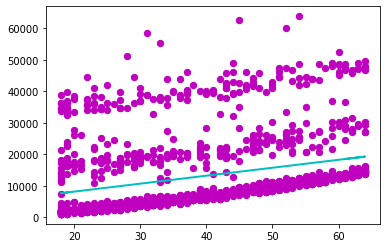

In [143]:
learning_rate = 0.001
epsilon = 0.0005
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon)
plot_hypothesis(x, y, theta, theta_0)

Normal Equation
Intercept : [8613.47408583]
Coefficients : [[22675.08827665]]

Training model...


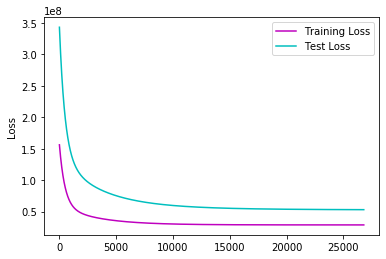


Calculated Parameter Values:

Intercept : 8690.625996913639
Coefficients : [[22347.44631182]]

Predict using test data...
R2 Score : 0.6695701325093246
Model Accuracy: 66.95701325093246%
Cost : 26489769.555103853
MSE : 52979539.11020771




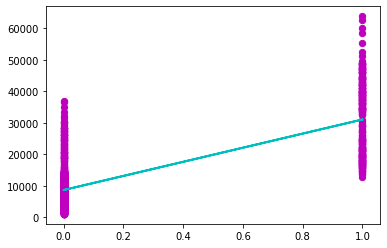

In [144]:
learning_rate = 0.001
epsilon = 0.05
x = df[["yes"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon)
plot_hypothesis(x, y, theta, theta_0)

### Multiple Variable Linear Regression

Normal Equation
Intercept : [-4560.22449506]
Coefficients : [[233.2996238 ]
 [276.34067529]]

Training model...


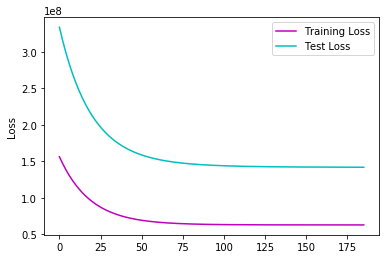


Calculated Parameter Values:

Intercept : 4.714131571147998
Coefficients : [[212.0477453 ]
 [156.48427726]]

Predict using test data...
R2 Score : 0.11621722396859702
Model Accuracy: 11.621722396859703%
Cost : 70850744.37014227
MSE : 141701488.74028453




(array([[212.0477453 ],
        [156.48427726]]), 4.714131571147998)

In [145]:
# Two features
x = df[["age", "bmi"]].values #two features 
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  0.00001, 0.05) 

Normal Equation
Intercept : [-11776.74104582]
Coefficients : [[23228.23169394]
 [  259.04134494]
 [  323.13099395]
 [  554.61283649]
 [ -279.97242054]
 [  -83.65060052]]

Training model...


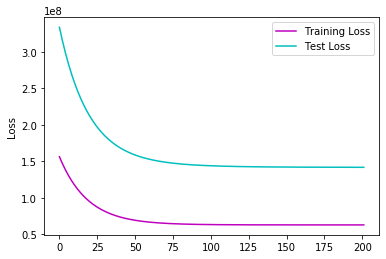


Calculated Parameter Values:

Intercept : 4.694954380461852
Coefficients : [[  8.36635589]
 [212.21768609]
 [156.66494938]
 [  7.24197257]
 [  6.26827776]
 [  2.97795763]]

Predict using test data...
R2 Score : 0.11700728563005902
Model Accuracy: 11.700728563005903%
Cost : 70787407.0226277
MSE : 141574814.0452554




(array([[  8.36635589],
        [212.21768609],
        [156.66494938],
        [  7.24197257],
        [  6.26827776],
        [  2.97795763]]), 4.694954380461852)

In [146]:
# All features
x = df[["yes", "age", "bmi", "children", "region", "male"]].values #all features 
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  0.00001, 0.05)  

## 2. Effects of Different Learning Rates

The learning rate $\alpha$ plays a pivotal role in the performance of the gradient descent algorithm. 

In [147]:
#----EFFECT OF DIFFERENT LEARNING RATES ON COVERGENCE---#

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


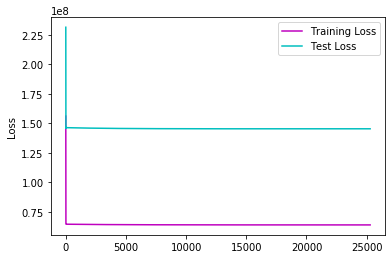


Calculated Parameter Values:

Intercept : 3137.293708697063
Coefficients : [[252.3984558]]

Predict using test data...
R2 Score : 0.09340195043459987
Model Accuracy: 9.340195043459987%
Cost : 72679790.10030557
MSE : 145359580.20061114




(array([[252.3984558]]), 3137.293708697063)

In [148]:
learning_rate = 0.001
epsilon = 0.0005
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon)

## 3. Improved Learning

### Feature Scaling

Feature scaling ensure that different features have similar scales. This ensures that the contour lines are more even and therefore gradient descent converges much faster. Feature scaling was implemented according to the following equation:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - x_{min_j}}{x_{max_j} - x_{min_j}}
\end{align}
$$

for each feature $j$ in order to scale the features to range between 0 and 1. A scaling factor was then utilised to investigate other scaling ranges.

In [149]:
#----FEATURE SCALING----#
# visualise outcome of each

#check if scale_factor is a legit method
def scale(x_j, scale_factor): # takes in an array of input values for a single feature
    x_scaled = (x_j-min(x_j))/(max(x_j)-min(x_j))
    x_scaled = x_scaled * scale_factor
    return x_scaled

### Feature Standardisation

Feature standardisation rescales features to have zero mean and unit variance. This is achieved using the following equation:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - \mu_{j}}{s_j}
\end{align}
$$

where $\mu_{j}$ is the mean of the feature $j$ and $s_j$ is the standard deviation of feature $j$.

It should be noted that standardisation must also be applied to the test data as well as the training data.
It should also be noted that standardization is not applied to the bias term $x_0$.

In [150]:
#----FEATURE STANDARDISATION----#

def standardize(x_j): # takes in an array of input values for a single feature
    x_standard = (x_j-np.mean(x_j))/(np.std(x_j))
    return x_standard

#### Single Variable Linear Regression

Input Features x Before Standardization

[[27.9  ]
 [33.77 ]
 [33.   ]
 [22.705]
 [28.88 ]
 [25.74 ]
 [33.44 ]
 [27.74 ]
 [29.83 ]
 [25.84 ]]
Input Features x After Standardization

[[-0.45332   ]
 [ 0.5096211 ]
 [ 0.38330685]
 [-1.30553108]
 [-0.29255641]
 [-0.80765608]
 [ 0.45548642]
 [-0.47956712]
 [-0.13671415]
 [-0.79125163]]
Normal Equation
Intercept : [13136.72676751]
Coefficients : [[2069.73310798]]

Training model...


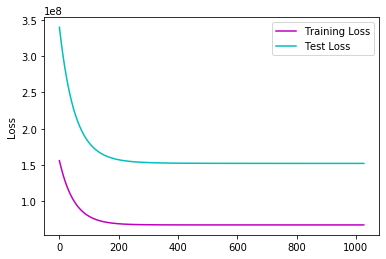


Calculated Parameter Values:

Intercept : 13136.299202382112
Coefficients : [[2069.68529911]]

Predict using test data...
R2 Score : 0.049927884276962486
Model Accuracy: 4.992788427696249%
Cost : 76165001.66088475
MSE : 152330003.3217695




(array([[2069.68529911]]), 13136.299202382112)

In [151]:
# Single variable
learning_rate = 0.01
epsilon = 0.0005
x = df[["bmi"]].values
print("Input Features x Before Standardization\n")
print(x[0:10])
x_standard = standardize(x)
print("Input Features x After Standardization\n")
print(x_standard[0:10])
y = df[["charges"]].values
#y_standard = standardize(y)
custom_linear_regr(x_standard, y,  learning_rate, epsilon) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get 4.9%, iterations 30

# seems worse for single variable??
# do we scale y as well??




Input Features x Before Standardization

[[27.9  ]
 [33.77 ]
 [33.   ]
 [22.705]
 [28.88 ]
 [25.74 ]
 [33.44 ]
 [27.74 ]
 [29.83 ]
 [25.84 ]]
Input Features x After Standardization

[[-0.45332   ]
 [ 0.5096211 ]
 [ 0.38330685]
 [-1.30553108]
 [-0.29255641]
 [-0.80765608]
 [ 0.45548642]
 [-0.47956712]
 [-0.13671415]
 [-0.79125163]]
Normal Equation
Intercept : [-0.01104421]
Coefficients : [[0.17097482]]

Training model...


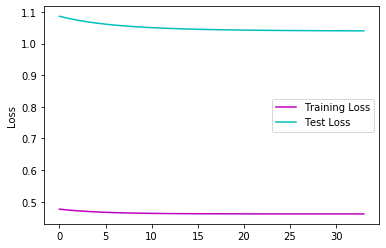


Calculated Parameter Values:

Intercept : -0.01072384843651494
Coefficients : [[0.16668516]]

Predict using test data...
R2 Score : 0.0492902629058255
Model Accuracy: 4.92902629058255%
Cost : 0.5200947140539044
MSE : 1.0401894281078088




(array([[0.16668516]]), -0.01072384843651494)

In [152]:
# Single variable

x = df[["bmi"]].values
print("Input Features x Before Standardization\n")
print(x[0:10])
x_standard = standardize(x)
print("Input Features x After Standardization\n")
print(x_standard[0:10])
y = df[["charges"]].values
y_standard = standardize(y)
custom_linear_regr(x_standard, y_standard,  0.1, 0.0005) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get 4.9%, iterations 30

# seems worse for single variable??
# do we scale y as well??


#### Multiple Variable Linear Regression

Normal Equation
Intercept : [-0.00704112]
Coefficients : [[ 0.77432617]
 [ 0.30053817]
 [ 0.1627177 ]
 [ 0.05520901]
 [-0.02554393]
 [-0.00345488]]

Training model...


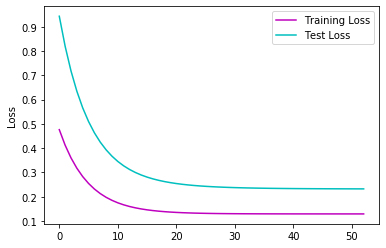


Calculated Parameter Values:

Intercept : -0.006976960896390543
Coefficients : [[ 0.77025369]
 [ 0.29870547]
 [ 0.16249449]
 [ 0.05583242]
 [-0.02591401]
 [-0.00209485]]

Predict using test data...
R2 Score : 0.7875105792128421
Model Accuracy: 78.7510579212842%
Cost : 0.11624433855233503
MSE : 0.23248867710467006




(array([[ 0.77025369],
        [ 0.29870547],
        [ 0.16249449],
        [ 0.05583242],
        [-0.02591401],
        [-0.00209485]]), -0.006976960896390543)

In [153]:
# Multiple variables
df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values 
#print(x_standard[0:10])
y = df[["charges"]].values
y_standard = standardize(y)
#y_scaled = (y-min(y))/(max(y)-min(y)) # how to perform for each feature??
#print(y_scaled[0:10])
custom_linear_regr(x_standard, y_standard,  0.1, 0.0005) # good results, 0.1, 0.0005, 50 iterations

In [154]:
# Combine standardization and scaling?? (Understand their relationship)

### Regularization

Regularization reduces the complexity of the hypothesis function by minimizing the parameter values $\theta$. Regularization therefore aids in combatting overfitting. Ridge regression was implemented by adding a penalty term to the cost function as follows:

$$
\begin{align}
J(\theta) &= \frac{1}{2n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^d \theta_{j}^2 
\end{align}
$$

where $\lambda$ is a hyperparameter controlling the amount of regularization applied. It should be noted that regularization is not performed on the bias term.

In [155]:
#----REGULARISATION----# 
# try different ones

def regularized_cost(pred, true, lambda_1, theta):
    cost = (1/2)*np.mean((true - pred)**2) + lambda_1*(np.dot(np.transpose(theta), theta)) # does this dot product mean the same as sum of squares of component thetas
    #NB no regularization on the bias term therefore leave out
    cost = cost[0][0] # return in value form
    return cost

Accordingly, the gradient equation is updated to include the penalty term as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{\lambda}{n} \theta_j + \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(x_j^{(i)}) 
\end{align}
$$

The gradient for the bias term remains unchanged.

In [156]:
def regularized_gradient(pred, true, x, lambda_1, theta):
    grad =  ((lambda_1 * theta)/ pred.shape[0]) + (np.dot(np.transpose(x),(pred-true))/ pred.shape[0])# check order of operations
    return grad

Lastly, we can also modify the normal equation in order to directly compute the regularized weights.

$$
\begin{align}
\theta = (X^T X + \lambda I)^{-1} X^Ty
\end{align}
$$

where $I$ is the identity matrix.

In [157]:
def regularized_normal_eq(x_train, y_train, lambda_1):
    # add bias or not??
    theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(x_train), x_train) + (lambda_1*np.identity(x_train.shape[1]))), np.dot(np.transpose(x_train), y_train)) #when is it a dot product and when not
    return theta_all

## 4. Additional Visualisations

## 5. Additional Techniques

In [158]:
# Take linear regr to the max! Inspo from websites + UCT assignment
# Make sure you have fulfilled requirements properly first

# Outlier detection/removal

In [159]:
#----BASIC LINEAR REGRESSION----#

# NB we need to manually do gradient descent!!
# Splitting into train and test sets is NB

#Explore linear relationship between age and charges (single variable linear regression)
#Use this to check our results
#Check result using scikit-learn
#x = df[["yes", "age", "bmi", "male", "children", "region"]] #all features included for now
x = df[["yes", "age", "bmi", "children", "region", "male"]] #all features included for now
#region makes a difference even though correlation is low??
y = df[["charges"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

model = LinearRegression() #create linear model
model.fit(x_train, y_train) #fit model to data
y_pred = model.predict(x_test)
print(model.intercept_)
print(model.coef_)


from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
mse =  mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))

[-11776.74104582]
[[23228.23169394   259.04134494   323.13099395   554.61283649
   -279.97242054   -83.65060052]]
R2 Score : 0.7879641066472154
Model Accuracy: 78.79641066472153%
Mean Squared Error: 33996817.50914569


In [160]:
#Explore linear relationship between smoking and charges (single variable linear regression)
#Rather implement yourself? - given it is so many marks
#Check result using scikit-learn
x = df[["bmi"]]
y = df[["charges"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

model = LinearRegression() #create linear model
model.fit(x_train, y_train) #fit model to data
y_pred = model.predict(x_test)
print(model.intercept_)
print(model.coef_)


from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
mse =  mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))
# We observe that approx. 62% of predictive power comes from smoking status

[2725.6360132]
[[339.52829171]]
R2 Score : 0.04993061727007797
Model Accuracy: 4.993061727007797%
Mean Squared Error: 152329565.12676993


In [161]:
#x = df[["yes", "age"]].values
x = df[["yes"]].values
#x = df[["bmi"]].values #x has each row as an array of features
y = df[["charges"]].values



#Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 


epsilon = 0.00001
lr = 0.00001 #learning rate was too high
#lr = 0.0000001
theta, theta_0 = batch_grad_desc(x_train, y_train, x_test, y_test, lr, epsilon) #what is the correct way to do this?
print(theta.size) #should be of length 2 - yes
print(theta)
print(theta_0)

y_pred_train = linear_pred(x_train, theta, theta_0)
print(cost(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))


y_pred = linear_pred(x_test, theta, theta_0) #predict
#plot
#score
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
# We observe that approx. 62% of predictive power comes from smoking status

print("Cost : {}".format(cost(y_pred, y_test)))
print("MSE : {}".format(mean_squared_error(y_test, y_pred)))

KeyboardInterrupt: 

In [ ]:
plt.plot(x_test, y_test, 'o')
f = lambda x_test: 247.90264149*x_test + 3337.27583294
# x values of line to plot
# plot fit
plt.plot(x_test,f(x_test),lw=2.5, c="k")

In [ ]:
plt.plot(x_test, y_test, 'o')
f = lambda x_test: 247.90264149*x_test + 3337.27583294
# x values of line to plot
# plot fit
plt.plot(x_test,f(x_test),lw=2.5, c="k")

In [ ]:
x = df[["yes", "age", "bmi", "children", "region", "male"]].values
print(x) #x has each row as an array of features
y = df[["charges"]].values
print(y)
# Verify that linear_pred function is working
theta_0 = -11815.45232123
theta = [23820.43412267,   257.28807486,   332.57013224,   479.36939355,
   -353.64001656,  -131.11057962]
y_pred = linear_pred(x, theta, theta_0) #predict
print(y_pred)
#plot
#score
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
# We observe that approx. 62% of predictive power comes from smoking status
print(y)
print(cost(y_pred, y)) #cost is really large???? because amounts are large?

In [ ]:
x = df[["yes"]].values
y = df[["charges"]].values

#Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

# Verify that linear_pred function is working
theta_0 = 8434.26829786
theta = 23615.96353368
y_pred = linear_pred(x_test, theta, theta_0) #predict

#plot
#score
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
# We observe that approx. 62% of predictive power comes from smoking status
print(cost(y_pred, y_test)) #cost is really large????
mse =  mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse)) #this is double since no (1/2) factor?